# PROBLEM STATEMENT

our client for this project is a Telecom company.

They are a leading telecom company with 5 million users.
They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.
They want to automate the process of keeping track of male and female users using their voice.
Their research and development teams are trying to understand the acoustic properties of the voice and speech so that they can use it to enhance the customer experience in their new product.

## CURRENT SCENARIO

Determining a person’s gender as male or female, based upon a sample of their voice, initially seems to be an easy task.

Often, the human ear can easily detect the difference between a male or a female voice within the first few spoken words.
However, designing a computer program to do this turns out to be a bit trickier.

Currently, the company is keeping track by manually entering the data for the user being male or female by listening to their voice which is a tedious task for the employees.

The current process suffers from the following problems:

The current process is a manual classification of gender using their voice. This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.

The company has hired you as a data science consultant.

They want to automate the process of predicting the male or female voice using acoustic properties of the voice or speech rather than doing this manual work.

Your Role You are given a dataset consisting of recorded voice samples, collected from male and female speakers. Your task is to build a classification model using the dataset. Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables Deliverable: Gender prediction using voice. Machine Learning Task: Classification Target Variable: label Win Condition: N/A (best possible model)

###### """""""
Dataset Feature Description
TThe following acoustic properties of each voice are measured and included in the dataset:

Column Name	Description
Id	Unique Id
meanfreq	Mean frequency (in kHz) for the voice sample
sd	Standard deviation of the frequency
median	Median frequency (in kHz) for the voice sample
Q25	First quantile (in kHz)
Q75	Third quantile (in kHz)
IQR	Interquartile range (in kHz)
skew	Skewness of the voice sample
kurt	Kurtosis of the voice sample
sp.ent	Spectral entropy
sfm	Spectral flatness of the voice sample
mode	Mode frequency
centroid	Frequency centroid
peakf	Peak frequency (the frequency with the highest energy)
meanfun	Average of fundamental frequency measured across the acoustic signal
minfun	Minimum fundamental frequency measured across the acoustic signal
maxfun	Maximum fundamental frequency measured across the acoustic signal
meandom	Average of dominant frequency measured across the acoustic signal
mindom	Minimum of dominant frequency measured across the acoustic signal
maxdom	Maximum of dominant frequency measured across the acoustic signal
dfrange	Range of dominant frequency measured across the acoustic signal
modindx	Modulation index. Calculated as the accumulated absolute difference between adjacent Measurements of fundamental frequencies divided by the frequency range
label	The label for the voice sample (male or female)

""""""

## Importing libraries and loading dataset

In [ ]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling                                            # For simple Exploratory data analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [ ]:
df=pd.read_csv('voice_train.csv')

In [45]:
df.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [47]:
df.describe()


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,...,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,...,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,...,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,...,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,...,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,...,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,...,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [48]:
df.isnull().sum()

Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

The above analysis depicts the following:
    1. there are 22 variables, 20 of float() datatype, 1 of int() datatype and last label, the predcitor varible of object() datatype
    2. there are no missing values in the dataset.
    3. there are no outliers.

In [41]:
df.label.value_counts()


female    1432
male      1419
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

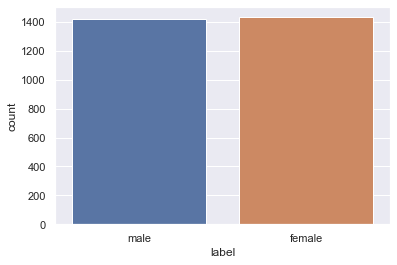

In [42]:
sns.countplot(df.label)


In [43]:
duplicates = df[df.duplicated()]
duplicates

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meanfreq'>

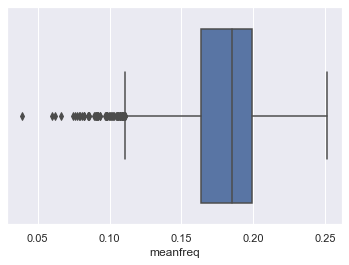

In [13]:
sns.boxplot(df.meanfreq)

## MODEL SELECTION

In [20]:
!pip install pycaret 

  Using cached pycaret-2.3.2-py3-none-any.whl (263 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached umap_learn-0.5.1-py3-none-any.whl
  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
  Using cached pyod-0.9.0-py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached spacy-2.

In [49]:
from pycaret.classification import *

In [50]:
clf1 = setup(data = df, 
          target = 'label')

,Description,Value
0,session_id,2117
1,Target,label
2,Target Type,Binary
3,Label Encoded,"female: 0, male: 1"
4,Original Data,"(2851, 22)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [51]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0100
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1530
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0110
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2640
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2110
et,Extra Trees Classifier,0.9995,1.0000,0.9990,1.0000,0.9995,0.9990,0.9990,0.1170
lr,Logistic Regression,0.9990,1.0000,0.9990,0.9990,0.9990,0.9980,0.9980,0.4700
knn,K Neighbors Classifier,0.9990,1.0000,0.9990,0.9990,0.9990,0.9980,0.9980,0.0100
ridge,Ridge Classifier,0.9970,0.0000,0.9960,0.9980,0.9970,0.9940,0.9940,0.0070
lda,Linear Discriminant Analysis,0.9925,0.9998,0.9960,0.9892,0.9925,0.9850,0.9851,0.0090


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2117, splitter='best')

In [52]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [53]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [54]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.4, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=False, random_state=2117, verbose=0,
                       warm_start=False)

In [55]:
predictions = predict_model(tuned_rf)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# DATA PREPROCESSING

In [56]:
df.drop(columns=['Id'], axis=1,inplace=True)

In [57]:
X = df.drop(columns=['label'], axis=1)
y = df['label']

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

## MODEL TRAINING

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5,scoring='f1')
    print("Cross validation(F1) is",np.mean(score)*100)
    

In [62]:
from sklearn.ensemble import RandomForestClassifier
model =  RandomForestClassifier()
classify(model, X, y)


Accuracy is 97.3352033660589
Cross validation(F1) is 98.05550565984615


In [63]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print("accuracy score",accuracy_score(y_test,y_pred))

[[352   9]
 [ 10 342]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       361
           1       0.97      0.97      0.97       352

    accuracy                           0.97       713
   macro avg       0.97      0.97      0.97       713
weighted avg       0.97      0.97      0.97       713

accuracy score 0.9733520336605891


## TEST SET PREDICTION

In [64]:
df1=pd.read_csv('voice_test.csv')

In [65]:
df1.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,...,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1,1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,...,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
2,170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,...,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3,3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,...,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
4,2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,...,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644


In [66]:
df1.drop(columns=['Id'], axis=1,inplace=True)

In [67]:
df1=scaler.transform(df1)

In [68]:
final_pred=model.predict(df1)

In [69]:
prediction = pd.DataFrame(final_pred).to_csv('submission.csv')